# INFO 213: Data Science Programming 2
___

### Week 2: KNN and Linear Algebra
___

### 9:30-10:50am, Mon., July 2, 2018
---

**Question:**
- What is the idea behind the nearest neighbor classification?
- What linear algebra concepts and operations I need to know for building effective models?

**Objectives:**
- Describe neighbors in terms of notions of distances
- Explain the issues with dimensionality
- Define and compute distances for multi-dimensional data
- Implement basic vector and matrix operations

## The Model


Nearest neighbors is one of the simplest predictive models there is. It makes no mathematical
assumptions, and it doesn’t require any sort of heavy machinery. The only
things it requires are:
- Some notion of distance
- An assumption that points that are close to one another are similar

In general, data are represented as vectors. For a given data $x$,  we find the nearest $k$ neighbors to predict $x$'s label. 

Let’s say we’ve picked a number $k$ like 3 or 5. Then when we want to classify some
new data point, we find the $k$ nearest labeled points and let them vote on the new
output.

![](knn.png)

To do this, we’ll need a function that counts votes. One possibility is:

```
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner
```

In [19]:
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

## Linear Algebra
Linear algebra is the branch of mathematics that deals with vector spaces. It underpins a large number
of data science concepts and techniques,
What we learn here we’ll use heavily throughout the rest of the course.

### Vectors
Vectors are points in some finite-dimensional space.

The simplest approach is to represent vectors as lists of numbers. A list
of three numbers corresponds to a vector in three-dimensional space, and vice versa:

```
height_weight_age = [70, # inches,
                    170, # pounds,
                    40 ] # years
```

In [20]:
height_weight_age = [70, # inches,
                    170, # pounds,
                    40 ] # years

```
height_weight_age```

In [3]:
height_weight_age

[70, 170, 40]

**Vector addition**: adding the vectors `[1, 2]` and `[2, 1]` results in `[1 + 2, 2 + 1]` or `[3,3]`:

![](vector-addition.png)

Similary, to substract two vectors we just subtract corresponding elements.

We’ll also need to be able to multiply a vector by a scalar, which we do simply by multiplying
each element of the vector by that number.

**dot product**: The dot product of two vectors is the sum of
their componentwise products:

$a\cdot b = a_{1}\cdot b_{1} + a_{2}\cdot b_{2} + ... + a_{n}\cdot b_{n}$

Visualization in geometric representations of vectors:

![](dot-product-1.png)
![](dot-product-projection.png)

### Vector Distance (in Euclidean Geometry)
We now have all the pieces we need to compute the distance between two vectors,
defined as:
$\sqrt{(a_{1} - b_{1})^{2} + (a_{2} - b_{2})^{2} + ... + (a_{n} - b_{n})^2}$

Visualization in terms of Pythagorean Law in trigonometry:  square of the hypotenuse (the side opposite the right angle) is equal to the sum of the squares of the other two sides. 

![](vector-distance.jpg)

### Exercise
Implement the various vector operations using randomly genreated vectors:

```
import numpy as np
v1 = np.random.rand(1, 20)```

In [4]:
import numpy as np
v1 = np.random.rand(1, 20)

```
v1```

In [5]:
v1

array([[0.576636  , 0.54038188, 0.09723127, 0.06574128, 0.00840026,
        0.06021117, 0.5040489 , 0.94636657, 0.32482977, 0.52141438,
        0.0753368 , 0.09760533, 0.60022269, 0.07798846, 0.13997776,
        0.83387894, 0.9522816 , 0.24347694, 0.37822125, 0.90460608]])

```
v2 = np.random.randint(2, 10, 20)```

In [6]:
v2 = np.random.randint(2, 10, 20)

```
v2```

In [7]:
v2

array([2, 8, 4, 8, 9, 3, 2, 2, 8, 9, 2, 3, 7, 6, 8, 8, 6, 8, 7, 5])

```
np.dot(v1, v2)```

In [8]:
np.dot(v1, v2)

array([44.57553387])

## Matrices
A matrix is a two-dimensional collection of numbers. In Mathematics, if A is a matrix, then `A[i][j]` is the element in the ith row and the jth column. However, in implementation, indices always start from 0, `A[i][j]` is the element in the i+1th row and j+1th column.

If a matrix has n rows and k columns, we will refer to it as a n × k matrix. We can
(and sometimes will) think of each row of a n × k matrix as a vector of length k, and
each column as a vector of length n.

```
m = np.random.randint(1, 5, (2,3))
m```

The shape of a matrix is the number of rows and the number of columns:

```
m.shape```

Identity matrix has 1s on its diagonal and 0s anywhere else:

```
np.identity(5)```

Diagonal elements can be retrieved using numpy function:

```
a = np.arange(15).reshape(3, 5)
a```

```
np.diagonal(a)```

Diagonla matrix has values on its diagonla and os anywhere else.

```
a = np.arange(4)
a```

```
np.diag(a)```

### Matrix Multiplication
**Elementwise multiplication**: takes two matrices of the same dimensions, and produces another matrix where each element i,j is the product of elements i,j of the original two matrices.

```
a = np.random.randint(1,6, (3, 2))
b = np.random.randint(1, 4, (3, 2))
a```

```
b```

```
a*b```

**Matrix multiplication**:  if A is an n × m matrix and B is an m × p matrix, their matrix product C = AB is an n × p matrix, in which `C[i][j]` is the dot product of `A[i, ]` the ith row of A and `B[, j]` the jth column of B. Therefor, the number of rows in A  must be equal to the number of column in B. 

![](matrix-multiply-order.gif)
![](matrix-multiply.svg)

```
a = np.arange(1, 7).reshape(2, 3)
a```

```
b = np.arange(7, 13).reshape(3, 2)
b```

```
np.matmul(a, b)```

## KNN
Let us implement the KNN algorithm using a set of example data about favorite programming languages for data scientists in different cities.

```
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]
```

In [1]:
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

```
cities[:3]```

In [2]:
cities[:3]

[([-86.75, 33.5666666666667], 'Python'),
 ([-88.25, 30.6833333333333], 'Python'),
 ([-112.016666666667, 33.4333333333333], 'Java')]

The following is a helper function for plotting US state borders.

```
import re
import matplotlib.pyplot as plt
%matplotlib inline

segments = []
points = []

lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

with open("US-states.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))

#def plot_state_borders(color='0.8'):
def plot_state_borders(color = 'black'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)

#plot_state_borders()```

In [11]:
import re
import matplotlib.pyplot as plt
%matplotlib inline

segments = []
points = []

lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

with open("US-states.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))

#def plot_state_borders(color='0.8'):
def plot_state_borders(color = 'black'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)

#plot_state_borders()

The following function plots the data in cities:

```
def plot_cities():

    # key is language, value is pair (longitudes, latitudes)
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

    # we want each language to have a different marker and color
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)
    
    plt.figure(figsize = (15, 9))
    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=10)

    plot_state_borders()    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title("Favorite Programming Languages")
    plt.show()```

In [9]:
def plot_cities():

    # key is language, value is pair (longitudes, latitudes)
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

    # we want each language to have a different marker and color
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    plt.figure(figsize = (15, 9))
    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=10)

    plot_state_borders()    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title("Favorite Programming Languages")
    plt.show()

```
plot_cities()```


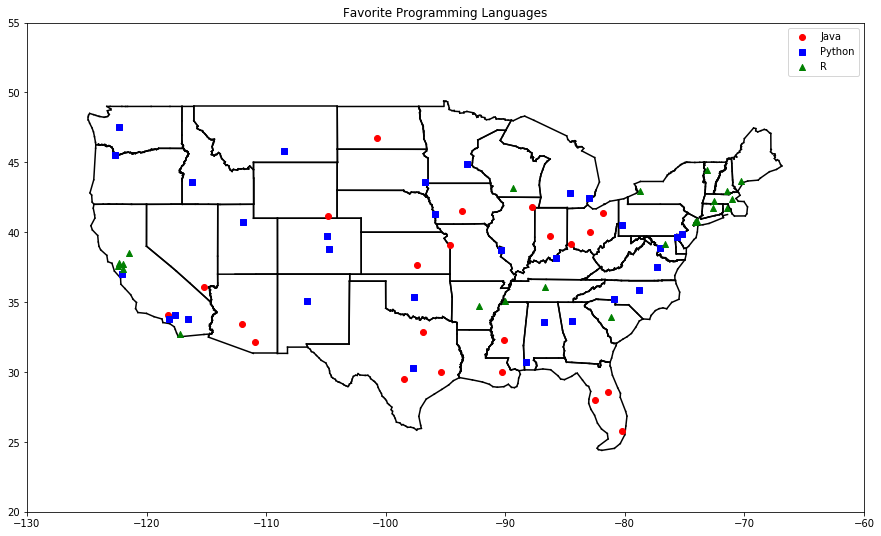

In [10]:
plot_cities()

Let’s say we’ve picked a number k like 3 or 5. Then when we want to classify some
new data point, we find the k nearest labeled points and let them vote on the new
output. To do this, we’ll need a function that counts votes. One possibility is:

```
from collections import Counter
import math, random

def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner```

In [13]:
from collections import Counter
import math, random

def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

```
labels = [2, 3, 3, 4, 4, 5]
Counter(labels).most_common(1)```

In [14]:
labels = [2, 3, 3, 4, 4, 5]
Counter(labels).most_common(1)

[(3, 2)]

What happens if there are several labels having equal majority votes? We need a strategy to break the tie. There are several options:
* Pick one of the winners at random.
* Weight the votes by distance and pick the weighted winner.
* Reduce k until we find a unique winner.

The following implements the third:

```
def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest```

In [21]:
def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest

With this, we can create a KNN classifier:

```
from scipy.spatial import distance
def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""

    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance.euclidean(point_label[0], new_point))

    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote
    return majority_vote(k_nearest_labels)```

In [24]:
from scipy.spatial import distance
def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""

    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance.euclidean(point_label[0], new_point))

    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote
    return majority_vote(k_nearest_labels)

To start with, let’s look at what happens if we try to predict each city’s preferred language
using its neighbors other than itself:

```
# try several different values for k
for k in [1, 3, 5, 7]:
    num_correct = 0

    for location, actual_language in cities:

        other_cities = [other_city
                         for other_city in cities
                         if other_city != (location, actual_language)]

        predicted_language = knn_classify(k, other_cities, location)

        if predicted_language == actual_language:
            num_correct += 1

    print(k, "neighbor[s]:", num_correct, "correct out of", len(cities))```

In [25]:
# try several different values for k
for k in [1, 3, 5, 7]:
    num_correct = 0

    for location, actual_language in cities:

        other_cities = [other_city
                         for other_city in cities
                         if other_city != (location, actual_language)]

        predicted_language = knn_classify(k, other_cities, location)

        if predicted_language == actual_language:
            num_correct += 1

    print(k, "neighbor[s]:", num_correct, "correct out of", len(cities))

1 neighbor[s]: 40 correct out of 75
3 neighbor[s]: 44 correct out of 75
5 neighbor[s]: 41 correct out of 75
7 neighbor[s]: 35 correct out of 75


Now we can look at what regions would get classified to which languages under each
nearest neighbors scheme. We can do that by classifying an entire grid worth of
points, and then plotting them as we did the cities:

```
def classify_and_plot_grid(k=1):
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "red", "Python" : "blue", "R" : "green" }

    for longitude in range(-130, -60):
        for latitude in range(20, 55):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    plt.figure(figsize = (15, 9))
    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

    plot_state_borders()    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title(str(k) + "-Nearest Neighbor Programming Languages")
    plt.show()```

```
classify_and_plot_grid(3)```

## The Curse of Demensionality
k-nearest neighbors runs into trouble in higher dimensions thanks to the “curse of
dimensionality,” which boils down to the fact that high-dimensional spaces are vast.
Points in high-dimensional spaces tend not to be close to one another at all. One way
to see this is by randomly generating pairs of points in the d-dimensional “unit cube”
in a variety of dimensions, and calculating the distances between them.

Let us define a function to compute a list (len = num_pairs) of distances between two points with dimensions $dim$:

```
from scipy.spatial import distance
import numpy as np
import random

def random_distances(dim, num_pairs):
    return [distance.euclidean(np.random.rand(1, dim), np.random.rand(1, dim))
            for _ in range(num_pairs)]```

For a range of dimensions between 1 and 101 with stride 5, compute 10000 distances:

```
dimensions = range(1, 101, 5)

avg_distances = []
min_distances = []

random.seed(0)
for dim in dimensions:
     distances = random_distances(dim, 10000)  # 10,000 random pairs
     avg_distances.append(np.mean(distances))     # track the average
     min_distances.append(min(distances))      # track the minimum
     #print(dim, min(distances), mean(distances), min(distances) / mean(distances))```

Plot the ratio between mininum distances and averge distances as the dimension increases:

```
plt.plot(list(dimensions), list(np.array(min_distances) / np.array(avg_distances)))```

In low-dimensional data sets, the closest points tend to be much closer than average.
But two points are close only if they’re close in every dimension, and every extra
dimension—even if just noise—is another opportunity for each point to be further
away from every other point. When you have a lot of dimensions, it’s likely that the
closest points aren’t much closer than average, which means that two points being
close doesn’t mean very much (unless there’s a lot of structure in your data that makes
it behave as if it were much lower-dimensional).

A different way of thinking about the problem involves the sparsity of higherdimensional
spaces.

If you pick 50 random numbers between 0 and 1, you’ll probably get a pretty good
sample of the unit interval:

![](fifty-points-one-dimension.png)

If you pick 50 random points in the unit square, you’ll get less coverage:

![](fifty-points-two-dimension.png)

And in three dimensions less still:

![](fifty-points-three-dimension.png)

So if you’re trying to use nearest neighbors in higher dimensions, it’s probably a good
idea to do some kind of dimensionality reduction first.